## Modules Import

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') # style sheet
pd.set_option('display.max_columns', None)
%matplotlib inline

camp_data = pd.read_csv(r'C:\Users\lyng1\OneDrive\Desktop\datasets\kaggle\ifood_df.csv')

In [114]:
camp_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [115]:
camp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [116]:
camp_data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [117]:
camp_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Features Exploration

In [118]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall', 'Response']
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','MntTotal', 'MntRegularProds']
customer = ['Income', 'Kidhome','Teenhome','Recency','Complain','Z_CostContact', 'Z_Revenue','Age', 'Customer_Days', 'marital_Divorced', 
            'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 
            'education_Graduation','education_Master', 'education_PhD']

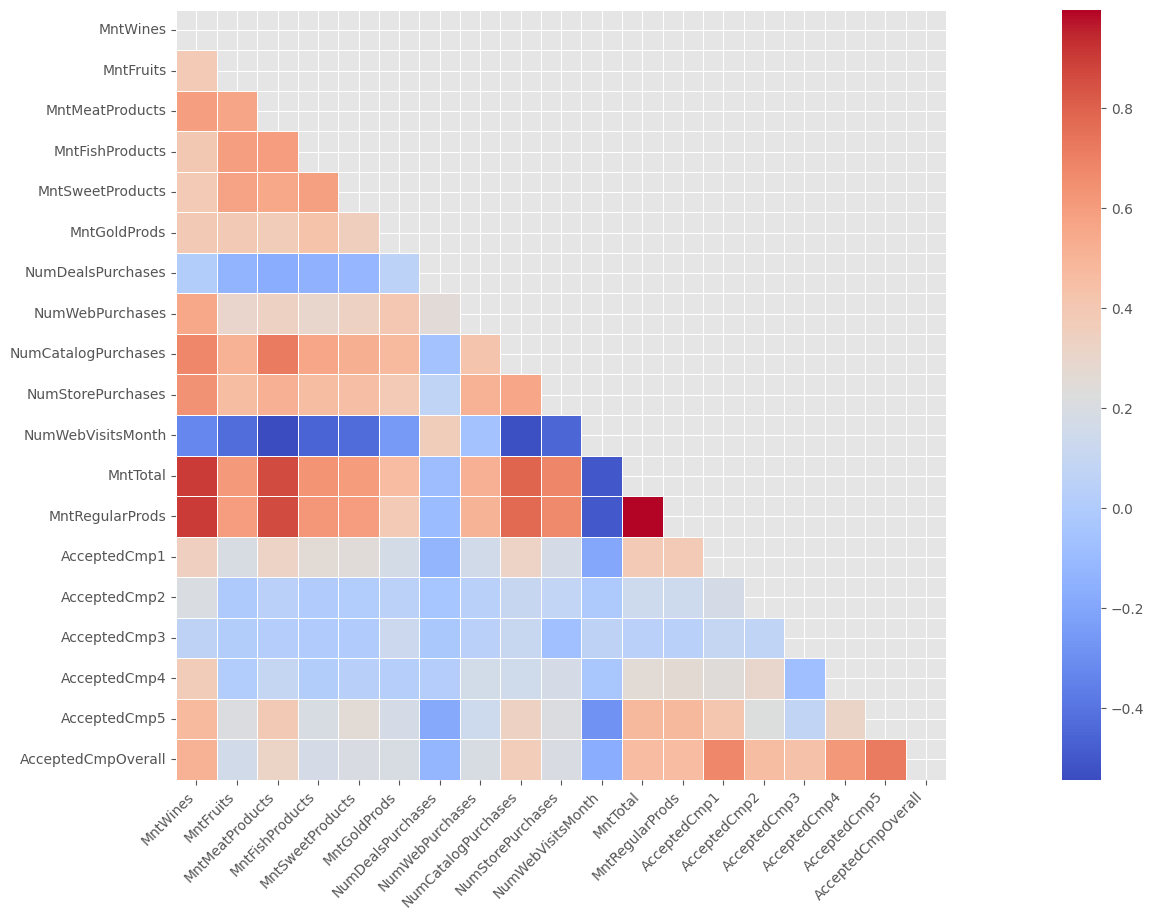

In [119]:
corr = camp_data[(products + campaigns[:-1])].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 10))

sns.heatmap(corr, mask=mask, cmap='coolwarm', square=True,linewidths=0.5)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.show()

## Campaigns Success

In [120]:
# # campaign 1 offer comparison(acceptance/refusal)
# for col in products + customer:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==1][col], color='Blue',label='accepted', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==0][col], color='Red', label='refused', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()

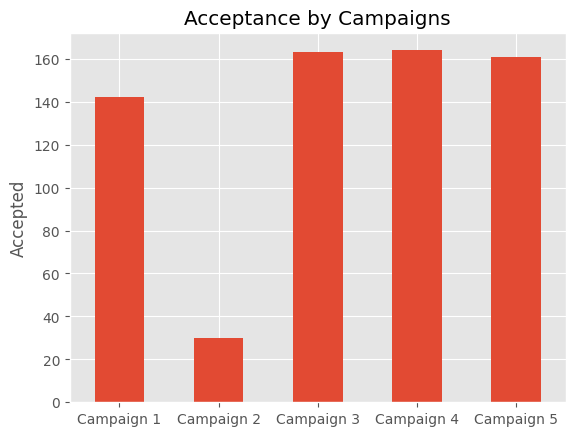

In [121]:
camp_name = {"AcceptedCmp1":"Campaign 1", "AcceptedCmp2":"Campaign 2",
             "AcceptedCmp3":"Campaign 3", "AcceptedCmp4":"Campaign 4",
             "AcceptedCmp5":"Campaign 5"}
# Extracting and Renaming data
camp_data[campaigns[:-2]].sum().rename(index=camp_name).plot.bar(legend=False)

# Plotting Data
plt.title("Acceptance by Campaigns")
plt.xticks(rotation=0)
plt.ylabel("Accepted")
plt.xlabel(None)
plt.show()

<Figure size 800x600 with 0 Axes>

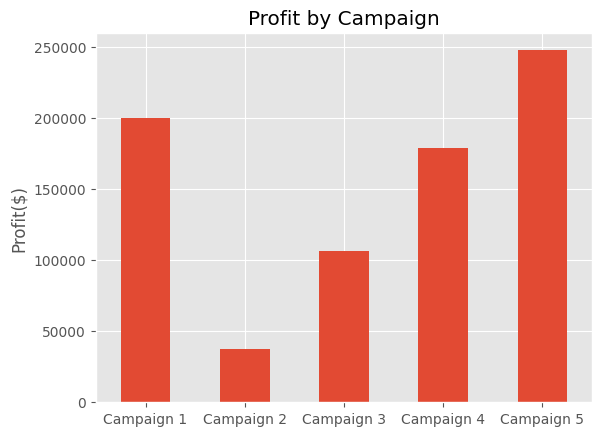

In [122]:
# create dictionary for profit by campaigns
profit_by_camp = {}
for camp in campaigns[:-2]:
    profit_by_camp[camp] = camp_data[camp_data[camp] == 1]['MntTotal'].sum()
    
# Convert from dictionary to df
mnt_total_df = pd.Series(profit_by_camp).to_frame().rename(index=camp_name)

# Plotting data
plt.figure(figsize=(8, 6))
mnt_total_df.plot.bar(legend=False)
plt.title('Profit by Campaign')
plt.xlabel(None)
plt.ylabel('Profit($)')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'product')

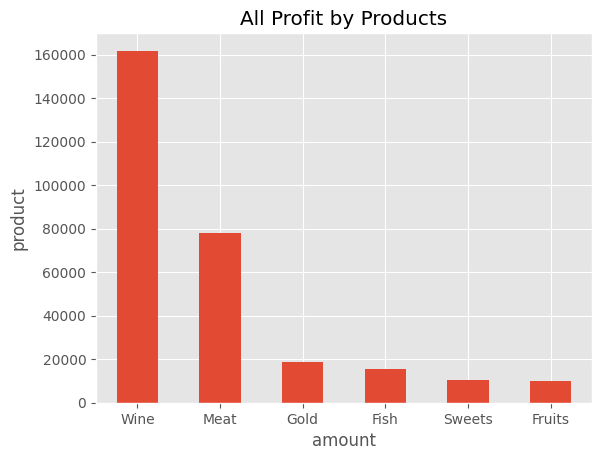

In [123]:
# # make a
# for camp in campaigns[:-1]:
#     plt.figure(figsize=(5, 3)) # sizing goes before heatmap (width,height)
#     camp_data[camp_data[camp]==1][products[:6]].sum().plot.barh()
#     plt.title(camp)
#     plt.show()
product_name = {'MntGoldProds':"Gold", "MntSweetProducts":"Sweets",
                "MntFishProducts":"Fish", "MntMeatProducts":"Meat",
                "MntFruits":"Fruits","MntWines":"Wine"}
camp_data[camp_data[campaigns[-2]]==1][products[:6]].rename(columns=product_name).sum().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title("All Profit by Products")
plt.xlabel('amount')
plt.ylabel('product')


Text(0.5, 1.0, 'Method Profit from All Campaigns')

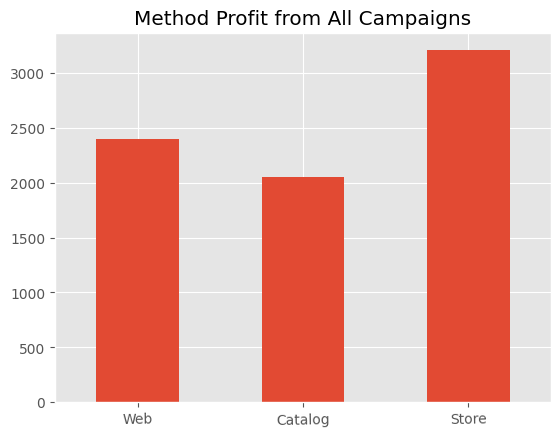

In [124]:
#Profit by Purchase Method in all campaign
method_names = {'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}
method_df = camp_data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'] + campaigns[:-1]].rename(columns=method_names)

method_df[method_df['AcceptedCmpOverall'] > 0][['Web','Catalog','Store']].sum().plot.bar()
plt.xticks(rotation=1)
plt.title("Method Profit from All Campaigns")

In [125]:
# Purchase Method Profits for each campaign
# for camp in campaigns[:-2]:
#     method_df[method_df[camp] > 0][['Web','Catalog','Store']].sum().plot.bar()
#     plt.xticks(rotation=1)
#     plt.title("Method Profit (" + camp_name[camp]+")")
#     plt.show()

In [126]:
camp_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Delve into specific campaigns
* Research on why campaign 2 in particular has both low profit and acceptance rate

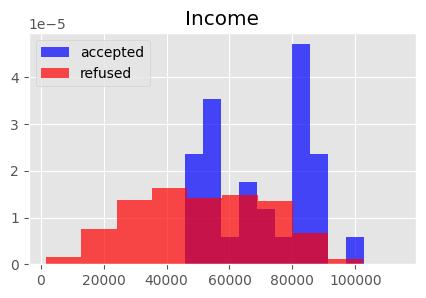

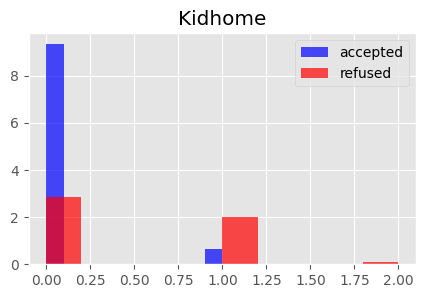

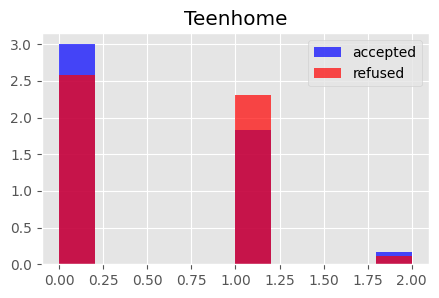

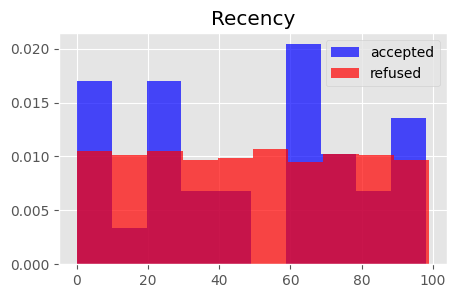

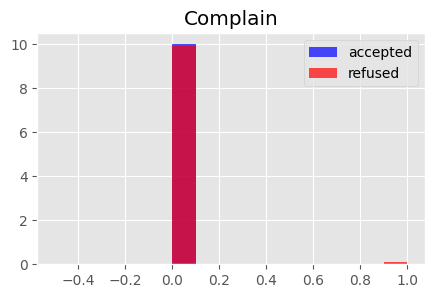

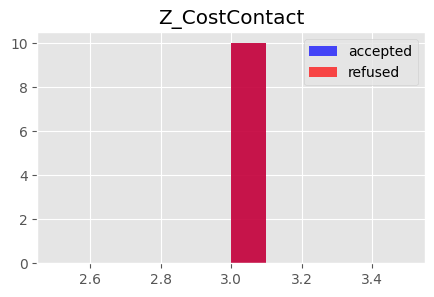

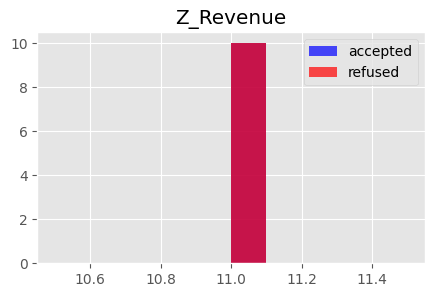

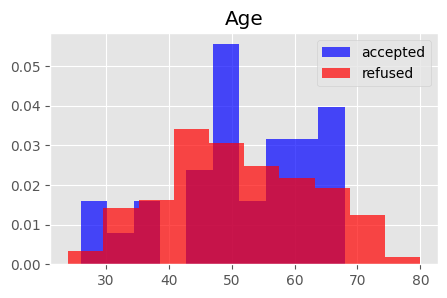

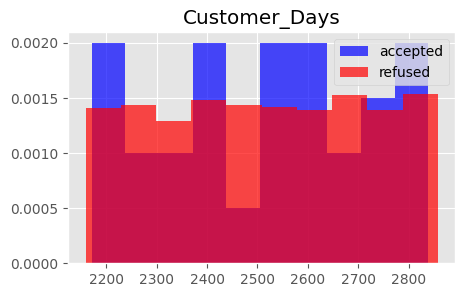

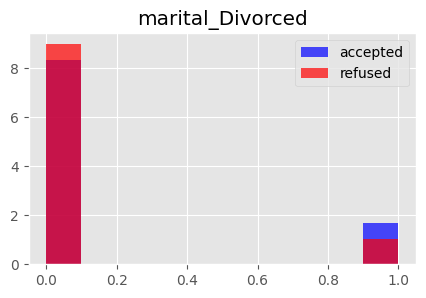

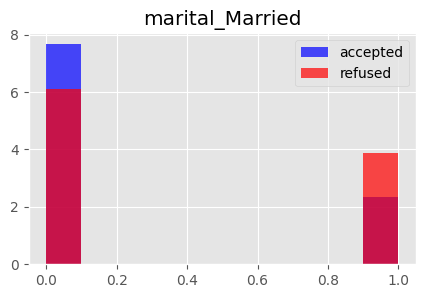

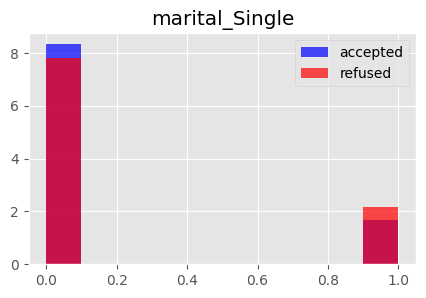

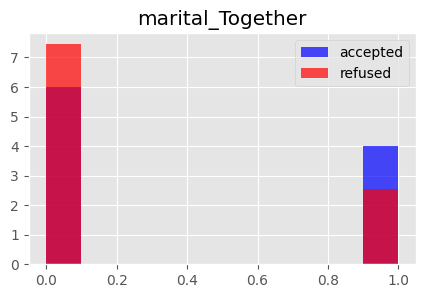

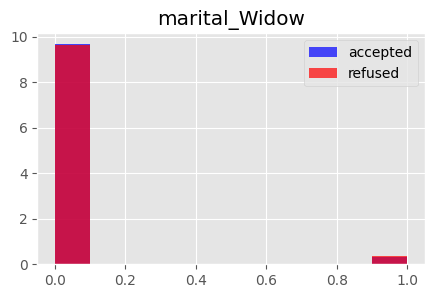

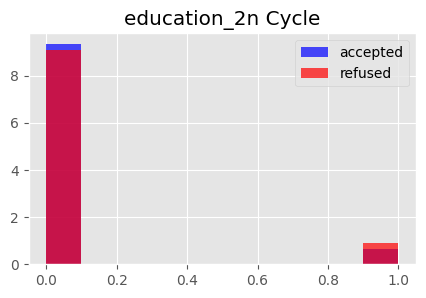

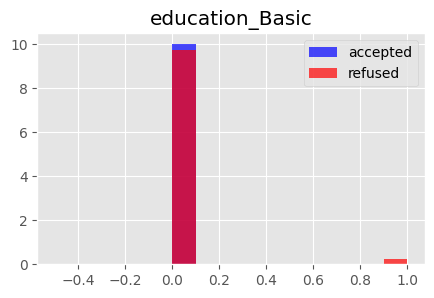

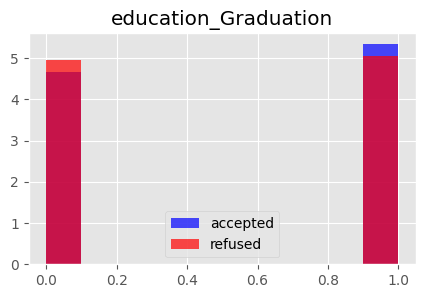

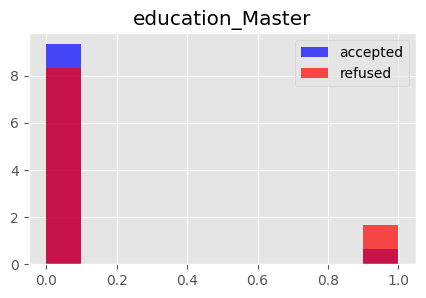

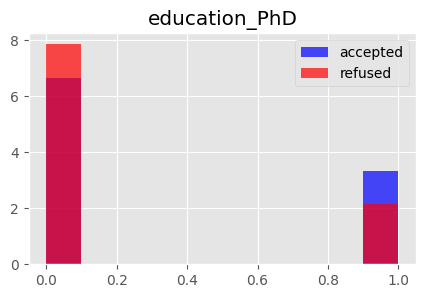

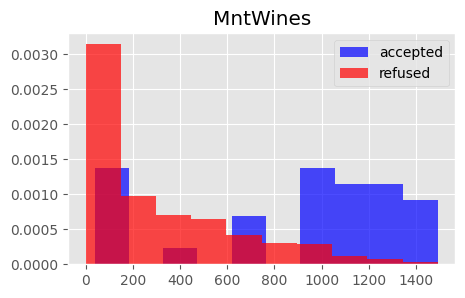

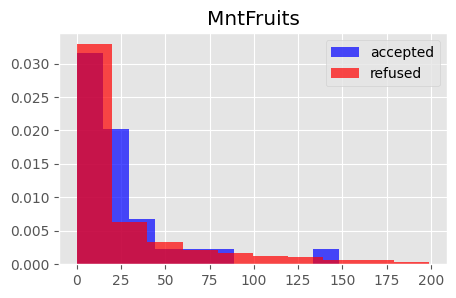

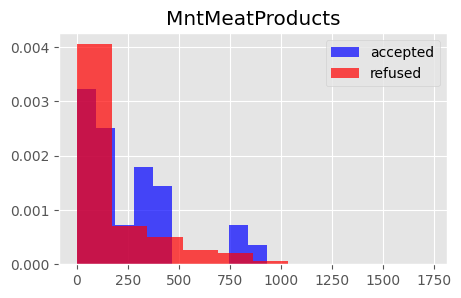

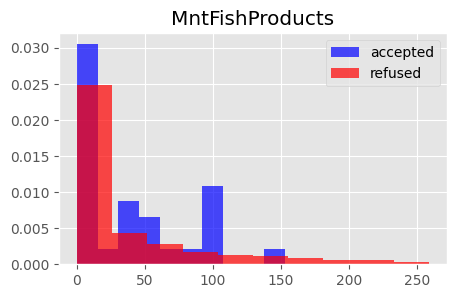

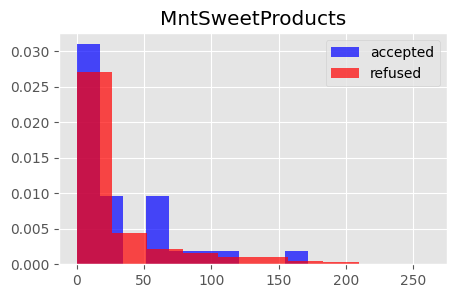

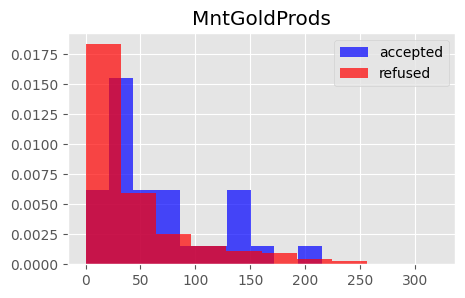

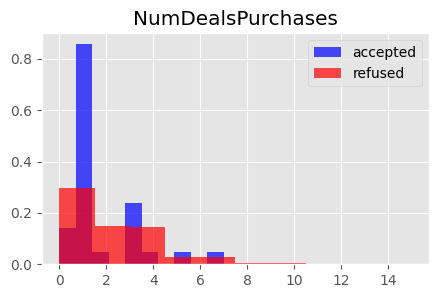

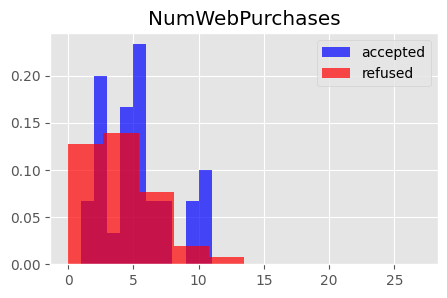

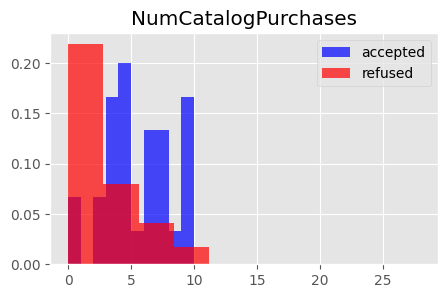

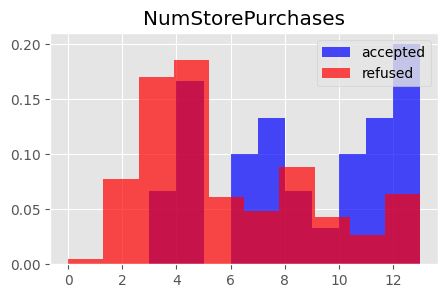

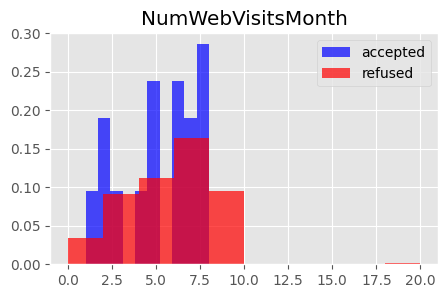

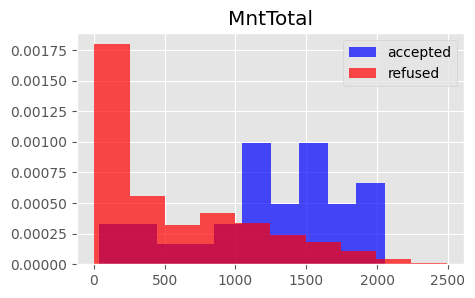

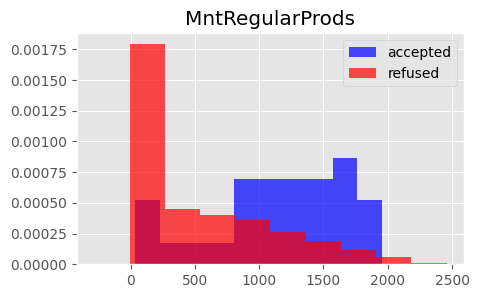

In [127]:
# 
for col in customer + products:
    plt.figure(figsize=(5, 3))
    plt.hist(camp_data[camp_data["AcceptedCmp2"] == 1][col], color = 'Blue', label='accepted', alpha=0.7, density=True)
    plt.hist(camp_data[camp_data['AcceptedCmp2']==0][col], color='Red', label='refused', alpha=0.7, density=True)    
    plt.legend()
    plt.title(col)
    plt.show()
    
    # # campaign 1 offer comparison(acceptance/refusal)
# for col in products + customer:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==1][col], color='Blue',label='accepted', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==0][col], color='Red', label='refused', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()

## Customer Demographic

### Brand's general demographic

Education Features are based on Brazil's education system; as iFood is a company in Brazil
* Basic - Upper Secondary Schooling, High School
* Graduation - Bachelor
* 2n Cycle - Diploma
* Master
* PhD


--------
*Notes:*
* Brand popular w/ Bachelor degree holders
* Brand's demographic in married customers, followed by "together" and "single"
    * Not much to note in 0 kids vs 1+ kids

In [128]:
# for col in products + customer:
#     plt.figure(figsize=(5,3))
#     plt.hist(camp_data[:][col], color='Blue',label='accepted', alpha=0.7, density=True)
#     plt.title(col)
#     plt.show()

In [258]:
# Customer demographic heatmap
# corr = camp_data[customer].corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# plt.figure(figsize=(20, 20)) 

# sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
# plt.show()

In [129]:
print("Median Income:",round(camp_data[['Income']].median().item()),
      "\nMean Income:",round(camp_data[['Income']].mean().item()))

Median Income: 51287 
Mean Income: 51622


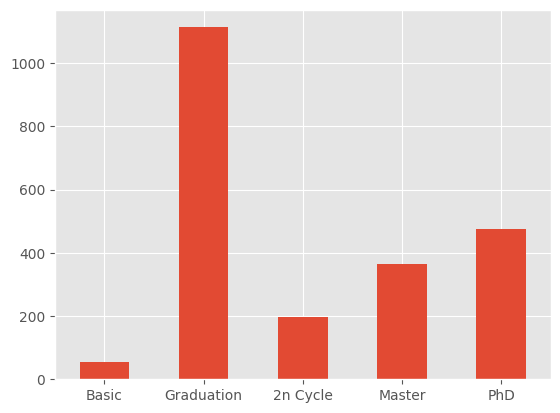

In [ ]:
# Explicit column names to specify bar ordering
edu_status = ['education_Basic','education_Graduation','education_2n Cycle','education_Master','education_PhD'] 
edu_df = camp_data[edu_status + [campaigns[-2]]]
new_edu_status = [status[10:] for status in edu_status]

general_edu = (edu_df.iloc[:,:-1]).sum().to_frame().rename(index=dict(zip(edu_status, new_edu_status)))
general_edu.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.show()

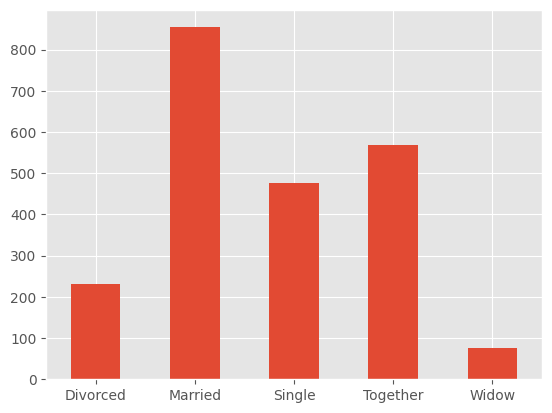

In [136]:
# General Kids and Marital Statuses
# gets columns for customer's marital status
marital_status = [column for column in customer if column.startswith('marital')]
new_m_status = [status[8:]for status in marital_status] # new names for marriage columns
marital_df = camp_data[marital_status + [campaigns[-2]]] # combined needed columns for chart

general_marital = (marital_df.iloc[:,:-1]).sum().to_frame().rename(index=dict(zip(marital_status, new_m_status)))
general_marital.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.show()

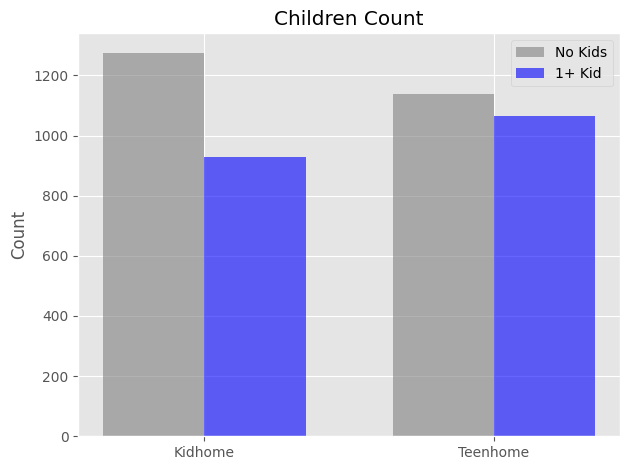

In [259]:
df = camp_data[['Kidhome','Teenhome']].copy()
df['Kidhome_group'] = df['Kidhome'].apply(lambda x: '0' if x == 0 else '1+')
df['Teenhome_group'] = df['Teenhome'].apply(lambda x: '0' if x == 0 else '1+')

# gets occurrence count
groups = ['Kidhome', 'Teenhome']
kidhome_counts = df['Kidhome_group'].value_counts().reindex(['0', '1+'], fill_value=0)
teenhome_counts = df['Teenhome_group'].value_counts().reindex(['0', '1+'], fill_value=0)

# plot data
bar_width = 0.35
x = range(len(groups))  # gets position in range (start, stop)

plt.bar(x, [kidhome_counts['0'], teenhome_counts['0']], width=bar_width, color='grey', alpha=0.6) # plots 0 values in respective position in range
plt.bar([p + bar_width for p in x], [kidhome_counts['1+'], teenhome_counts['1+']], width=bar_width, color='blue', alpha=0.6) # add offset to the positions through range

# Add labels and adjust x-ticks to show Kidhome and Teenhome as groups
plt.ylabel('Count')
plt.title('Children Count')
plt.xticks([p + bar_width / 2 for p in x], groups)
custom_labels = ['No Kids', '1+ Kid']
plt.legend(labels=custom_labels)

# Improve layout
plt.tight_layout()
plt.show()

### Explore successful demographic

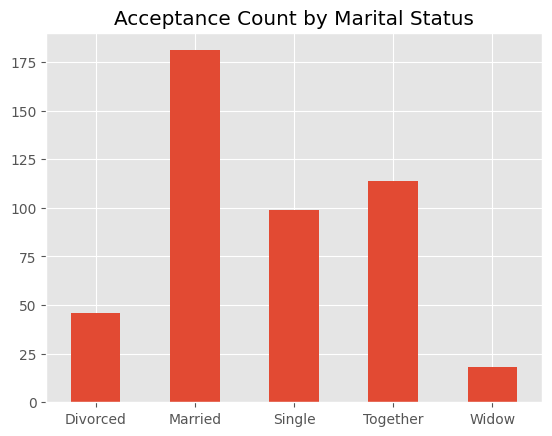

In [47]:
new_marital_df = marital_df[marital_df['AcceptedCmpOverall'] > 0][marital_status].sum().rename(index = dict(zip(marital_status, new_m_status)))

# Plotting Data
new_marital_df.plot.bar()
plt.xticks(rotation=0)
plt.title("Acceptance Count by Marital Status")
plt.show()

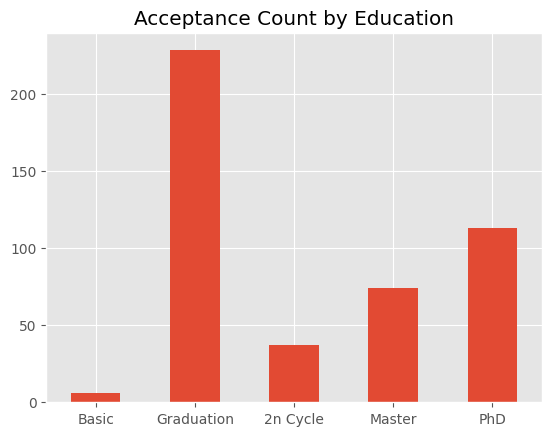

In [48]:
new_edu_df = edu_df[edu_df['AcceptedCmpOverall'] > 0][edu_status].sum().rename(index = dict(zip(edu_status, new_edu_status)))

# Plotting Data
new_edu_df.plot.bar()
plt.xticks(rotation=0)
plt.title("Acceptance Count by Education")
plt.show()

## Further Exploration

### Complaints
Complain = 1 indicates complaints within past 2 years
* Explore recency, and membership length with complaints, age
* Explore primary audience and our effectiveness, as well as the least effective audience reach


-----
*Notes:*
* 1747 customers who accepted 0 offers
    * Hence, not every campaign will have a complaint
* 20 customer who complained within last 2 years

In [52]:
print("Customers w/ no offers accepted:",camp_data[camp_data['AcceptedCmpOverall'] == 0].shape[0],
      "\nTotal Complaints:", camp_data[camp_data['Complain'] == 1].shape[0])

Customers w/ no offers accepted: 1747 
Total Complaints: 20


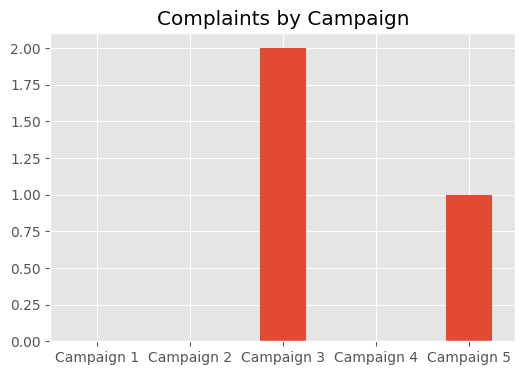

In [53]:
complaints_df = camp_data[camp_data['Complain'] == 1][campaigns[:-2]].sum().rename(index=camp_name)
plt.figure(figsize=(6,4))
complaints_df.plot.bar()
plt.title("Complaints by Campaign")
plt.xticks(rotation=0)
plt.show()

In [54]:
# Comparison between complained and no complaints within last 2 years
# for col in products +customer+[campaigns[-2]]:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['Complain']==1][col], color='Blue',label='Complained', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['Complain']==0][col], color='Red', label='None', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()